# UTN FRBA 
## Ciencia de Datos - Ingeniería Industrial
### Examen Practico 9 noviembre 2019

### Importamos algunas librerias. Puede ser que falten algunas y tengas que importarlas vos mas adelante.

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.datasets import load_wine
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

### El dataset esta pre-cargado. Con solo correr esta celda se cargará la matriz de sample-features en la variable "x" con sus etiquetas en la variable "y".

In [2]:
data = load_wine()

# pre-cargar labels
y = data.target
# pre-cargar samples y features
x = data.data

print(np.unique(y))

x_to_scal = pd.DataFrame(x)
x_to_scal.head()

[0 1 2]


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


### Ejercicio 01:
Realizar un PCA con 2 componentes sobre la matrix "x" y obtener una matriz "xpca". Es decir que "xpca" tendra las nuevas features (componentes principales) obtenidas por el PCA. Con las dos componentes principales del PCA que se encuentran en la matriz "xpca" realizar un scatter plot para visualizar el dataset.

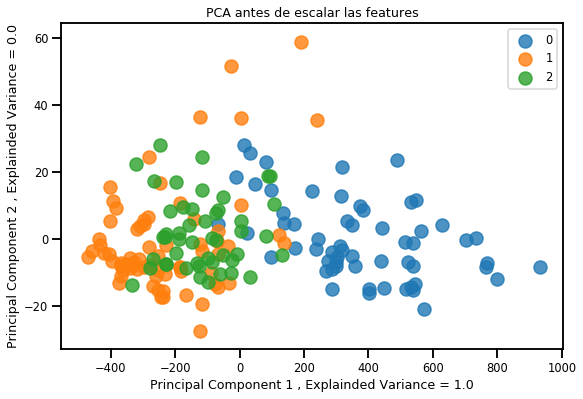

Como el resultado de los datos no me satisfac debido a que toda la variabilidad queda explicada por una unica variable (la componente 1) procedo a volver a realizar el PCA pero esta vez escalando los datos


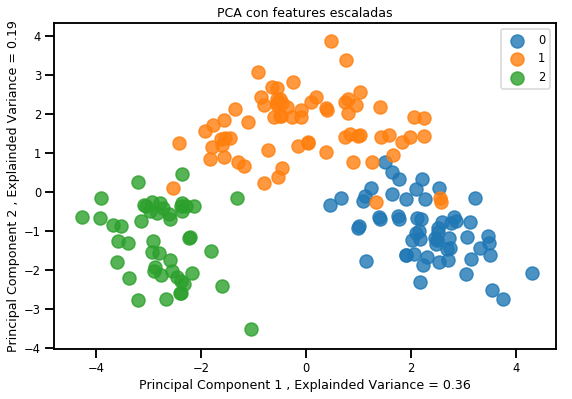

In [3]:
import seaborn as sns
from sklearn import preprocessing

pca = PCA(n_components= 2)
# fit_transform del PCA a nuestros datos
xpca = pd.DataFrame(pca.fit_transform(x_to_scal))
# obtenemos los auto-valores
eigenvalues = pca.explained_variance_ratio_

sns.set_context("talk", font_scale=0.7)
plt.figure(figsize=(9,6))
#plt.scatter(xpca[0].,xpca[1],c=y)
plt.scatter(xpca[(y == 0).ravel()][0], xpca[(y == 0).ravel()][1], alpha = 0.8, s= 170, label='0')
plt.scatter(xpca[(y == 1).ravel()][0], xpca[(y == 1).ravel()][1], alpha = 0.8, s= 170, label = '1')
plt.scatter(xpca[(y == 2).ravel()][0], xpca[(y == 2).ravel()][1], alpha = 0.8, s= 170, label = '2')
plt.xlabel('Principal Component 1 , Explainded Variance = ' + str(np.round(eigenvalues[0],2)))
plt.ylabel('Principal Component 2 , Explainded Variance = ' + str(np.round(eigenvalues[1],2)))
plt.title('PCA antes de escalar las features')
plt.legend(loc='upper right')
plt.show()

print('Como el resultado de los datos no me satisfac debido a que toda la variabilidad queda explicada por una unica variable (la componente 1) procedo a volver a realizar el PCA pero esta vez escalando los datos')

scaler = preprocessing.StandardScaler().fit(x_to_scal)
x_scal = scaler.transform(x_to_scal)

pca = PCA(n_components= 2)
# fit_transform del PCA a nuestros datos
xpca = pd.DataFrame(pca.fit_transform(x_scal))
# obtenemos los auto-valores
eigenvalues = pca.explained_variance_ratio_

sns.set_context("talk", font_scale=0.7)
plt.figure(figsize=(9,6))
#plt.scatter(xpca[0].,xpca[1],c=y)
plt.scatter(xpca[(y == 0).ravel()][0], xpca[(y == 0).ravel()][1], alpha = 0.8, s= 170, label='0')
plt.scatter(xpca[(y == 1).ravel()][0], xpca[(y == 1).ravel()][1], alpha = 0.8, s= 170, label = '1')
plt.scatter(xpca[(y == 2).ravel()][0], xpca[(y == 2).ravel()][1], alpha = 0.8, s= 170, label = '2')
plt.xlabel('Principal Component 1 , Explainded Variance = ' + str(np.round(eigenvalues[0],2)))
plt.ylabel('Principal Component 2 , Explainded Variance = ' + str(np.round(eigenvalues[1],2)))
plt.title('PCA con features escaladas')
plt.legend(loc='upper right')
plt.show()

### Ejercicio 02:
Utilizando la matriz original "x" dividir en train y test. Realizar una clasificación multi-class (ver que el vector de etiquetas "y" tiene 3 clases) utilizando un clasificador KNN. Durante el entrenamiento del KNN aplicar gridsearchCV para 3 valores del hiperparametro "K". Imprimir en pantalla la matriz de confusión y el Accuracy para los datos de test (seguramente tengas que importar algunas librerias).

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

scaler = preprocessing.StandardScaler().fit(x_train)
xtrain_scal = scaler.transform(x_train)
xtest_scal = scaler.transform(x_test)

Para tener una idea de que valores de K utilizar en el GridSearchCV realizo el analisis de los distintos accuracy que puedo obtener con distintos K


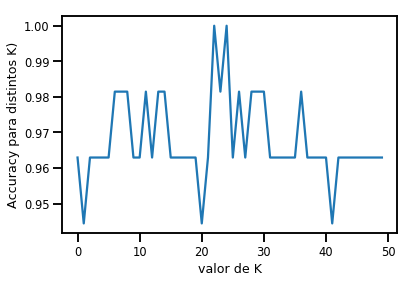

El accuracy maximo logrado es 1.0 con [22 24] vecinos


In [5]:
print('Para tener una idea de que valores de K utilizar en el GridSearchCV realizo el analisis de los distintos accuracy que puedo obtener con distintos K')
acc_knn = np.zeros(50)
for n in range (0,50):
    neigh = KNeighborsClassifier(n_neighbors=n+1)
    neigh.fit(xtrain_scal, y_train)
    y_knn_predict = neigh.predict(xtest_scal)
    acc_knn[n] = accuracy_score(y_test,y_knn_predict)

plt.plot(acc_knn)
plt.xlabel("valor de K")
plt.ylabel("Accuracy para distintos K)")
plt.show()

print('El accuracy maximo logrado es ' + str(acc_knn.max()) + ' con ' + str(np.where(acc_knn == acc_knn.max())[0]) + ' vecinos')

In [6]:
#Creo el clasificador que utilizaré y la grilla de parametros que utilizaré para el GridSearchCV
neigh = KNeighborsClassifier()
knn_parameters = {'n_neighbors': (22,23,24)}
neigh_cv = GridSearchCV(neigh,knn_parameters,cv=5, refit=True)

C:\Users\Ezequiel Vannucchi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


La precision del test es 1.0
El mejor numero de neighbours es: {'n_neighbors': 23}


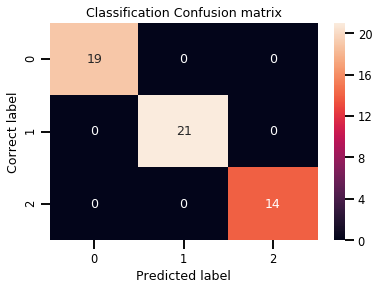

In [7]:
#Entreno el modelo, predigo el set de prueba y computo el accuracy
neigh_cv.fit(xtrain_scal, y_train)
y_knn_predict = neigh_cv.predict(xtest_scal)
test_acc = accuracy_score(y_test,y_knn_predict.ravel())
    
print('La precision del test es ' +str(test_acc))
print('El mejor numero de neighbours es: '+str(neigh_cv.best_params_))

#Por ultimo creo la matriz de confusion y la grafico
cm = confusion_matrix(y_test,y_knn_predict)
df_cm = pd.DataFrame(cm, index = ['0', '1','2'], columns = ['0', '1','2'])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True)
plt.title('Classification Confusion matrix')
plt.ylabel('Correct label')
plt.xlabel('Predicted label')
plt.show()